In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime

1. Data Collection

In [54]:
now = datetime.now()
ticker = 'AAPL'
start = datetime(now.year-10, now.month, now.day)
end = now
df = yf.download(ticker, start, end)
df

/tmp/ipykernel_212762/3974189832.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start, end)
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2015-07-17,29.030579,29.030579,28.737183,28.909638,184658800
2015-07-20,29.579304,29.780873,29.272467,29.332939,235600800
2015-07-21,29.283653,29.769661,29.187349,29.753985,307025600
2015-07-22,28.045126,28.107836,27.321712,27.321712,461802400
2015-07-23,28.031693,28.463947,28.009294,28.264617,203998000
...,...,...,...,...,...
2025-07-10,212.410004,213.479996,210.029999,210.509995,44443600
2025-07-11,211.160004,212.130005,209.860001,210.570007,39765800


2. Data exploration & visualization

In [55]:
type(df)

pandas.core.frame.DataFrame

In [56]:
df.shape

(2514, 5)

In [57]:
df.isna().sum()

Price   Ticker
Close   AAPL      0
High    AAPL      0
Low     AAPL      0
Open    AAPL      0
Volume  AAPL      0
dtype: int64

In [58]:
df.describe()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
count,2514.000000,2514.000000,2514.000000,2514.000000,2.514000e+03
mean,104.057347,105.101243,102.900391,103.955655,1.092540e+08
std,69.047606,69.723153,68.281979,68.968590,6.430112e+07
min,20.647455,20.951433,20.448615,20.569750,2.323470e+07
25%,39.366800,39.874941,38.876703,39.310320,6.633740e+07
50%,92.532475,93.005136,91.121760,91.644234,9.409950e+07
75%,164.572842,166.444355,163.244944,164.634255,1.329981e+08
max,258.396667,259.474086,257.010028,257.568678,6.488252e+08


In [59]:
df.dtypes

Price   Ticker
Close   AAPL      float64
High    AAPL      float64
Low     AAPL      float64
Open    AAPL      float64
Volume  AAPL        int64
dtype: object

In [60]:
df = df.reset_index()

In [61]:
df.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL
0,2015-07-17,29.030579,29.030579,28.737183,28.909638,184658800
1,2015-07-20,29.579304,29.780873,29.272467,29.332939,235600800
2,2015-07-21,29.283653,29.769661,29.187349,29.753985,307025600
3,2015-07-22,28.045126,28.107836,27.321712,27.321712,461802400
4,2015-07-23,28.031693,28.463947,28.009294,28.264617,203998000


Text(0, 0.5, 'Close price')

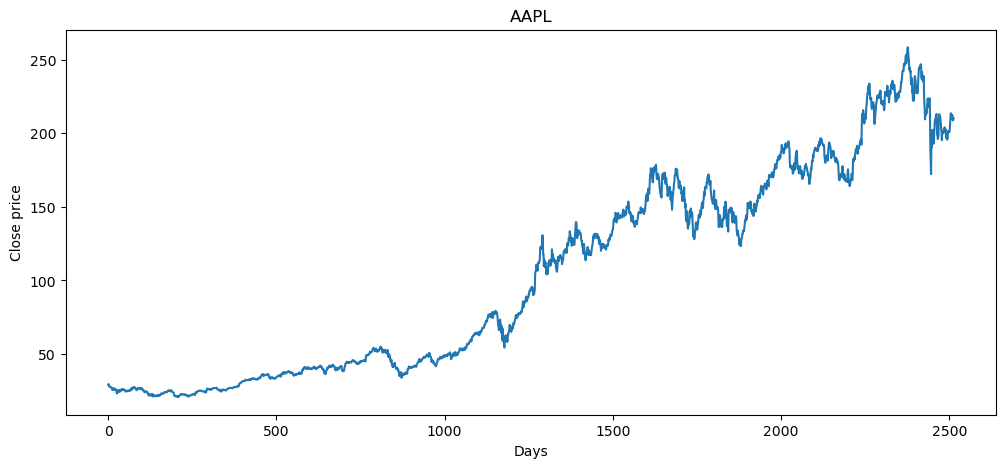

In [62]:
plt.figure(figsize=(12, 5))
plt.plot(df.Close)
plt.title(ticker)
plt.xlabel('Days')
plt.ylabel('Close price')

3. Feature Engineering

In [63]:
df['MA_100'] = df.Close.rolling(100).mean()
df.head()

Price,Date,Close,High,Low,Open,Volume,MA_100
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,
0,2015-07-17,29.030579,29.030579,28.737183,28.909638,184658800,NaN
1,2015-07-20,29.579304,29.780873,29.272467,29.332939,235600800,NaN
2,2015-07-21,29.283653,29.769661,29.187349,29.753985,307025600,NaN
3,2015-07-22,28.045126,28.107836,27.321712,27.321712,461802400,NaN
4,2015-07-23,28.031693,28.463947,28.009294,28.264617,203998000,NaN


Text(0, 0.5, 'Price')

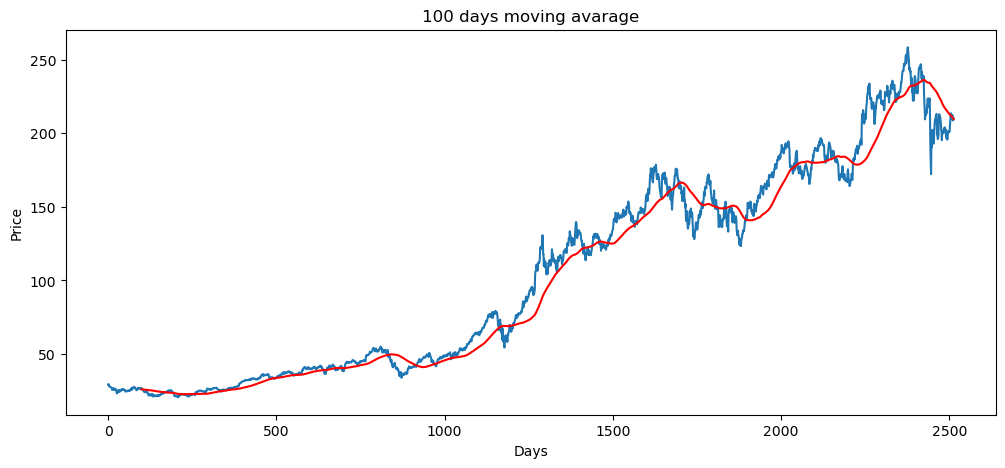

In [64]:

plt.figure(figsize=(12, 5))
plt.plot(df.Close)
plt.plot(df['MA_100'], 'r')
plt.title('100 days moving avarage')
plt.xlabel('Days')
plt.ylabel('Price')

200 Days moving avarage

In [65]:
df['MA_200'] = df.Close.rolling(200).mean()
df.head(203)

Price,Date,Close,High,Low,Open,Volume,MA_100,MA_200
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,,
0,2015-07-17,29.030579,29.030579,28.737183,28.909638,184658800,NaN,NaN
1,2015-07-20,29.579304,29.780873,29.272467,29.332939,235600800,NaN,NaN
2,2015-07-21,29.283653,29.769661,29.187349,29.753985,307025600,NaN,NaN
3,2015-07-22,28.045126,28.107836,27.321712,27.321712,461802400,NaN,NaN
4,2015-07-23,28.031693,28.463947,28.009294,28.264617,203998000,NaN,NaN
...,...,...,...,...,...,...,...,...
198,2016-04-29,21.294878,21.517505,21.015460,21.351670,274126000,23.371751,NaN
199,2016-05-02,21.272161,21.372117,20.990472,21.347128,192640400,23.317226,24.681323
200,2016-05-03,21.622007,21.749222,21.281253,21.399380,227325200,23.266313,24.644280


Text(0, 0.5, 'Price')

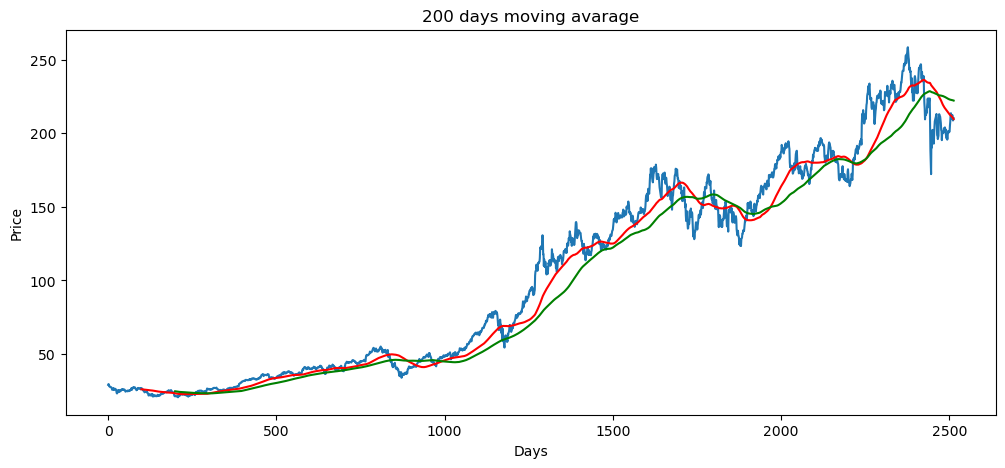

In [66]:
plt.figure(figsize=(12, 5))
plt.plot(df.Close)
plt.plot(df['MA_100'], 'r')
plt.plot(df['MA_200'], 'g')
plt.title('200 days moving avarage')
plt.xlabel('Days')
plt.ylabel('Price')

In [67]:
df


Price,Date,Close,High,Low,Open,Volume,MA_100,MA_200
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,,
0,2015-07-17,29.030579,29.030579,28.737183,28.909638,184658800,NaN,NaN
1,2015-07-20,29.579304,29.780873,29.272467,29.332939,235600800,NaN,NaN
2,2015-07-21,29.283653,29.769661,29.187349,29.753985,307025600,NaN,NaN
3,2015-07-22,28.045126,28.107836,27.321712,27.321712,461802400,NaN,NaN
4,2015-07-23,28.031693,28.463947,28.009294,28.264617,203998000,NaN,NaN
...,...,...,...,...,...,...,...,...
2509,2025-07-10,212.410004,213.479996,210.029999,210.509995,44443600,210.972337,222.487793
2510,2025-07-11,211.160004,212.130005,209.860001,210.570007,39765800,210.641140,222.406590
2511,2025-07-14,208.619995,210.910004,207.539993,209.929993,38840100,210.285842,222.321306


In [68]:
df['Percentage Changed'] = df.Close.pct_change()
df[['Close', 'Percentage Changed']]

Price,Close,Percentage Changed
Ticker,AAPL,
0,29.030579,NaN
1,29.579304,0.018902
2,29.283653,-0.009995
3,28.045126,-0.042294
4,28.031693,-0.000479
...,...,...
2509,212.410004,0.006015
2510,211.160004,-0.005885
2511,208.619995,-0.012029


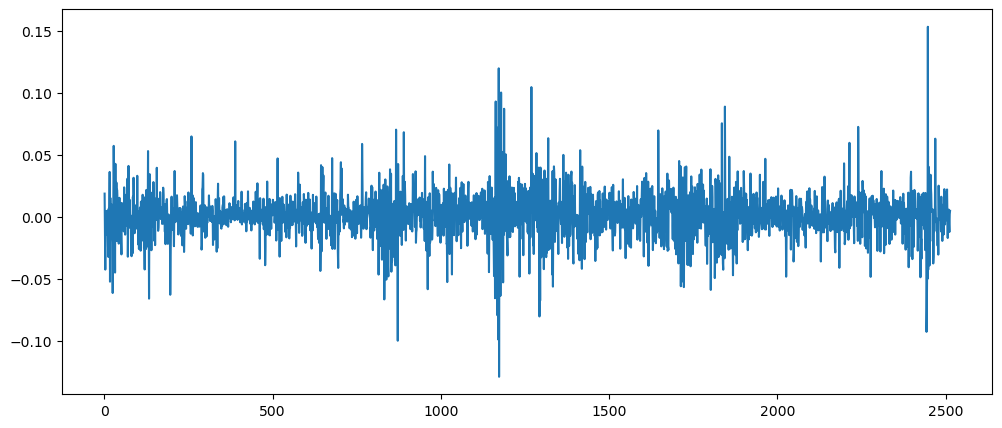

In [69]:
plt.figure(figsize=(12, 5))
plt.plot(df['Percentage Changed'])

4. Data preprocessing

In [70]:
df.shape

(2514, 9)

In [71]:
data_training = pd.DataFrame(df.Close[0:int(len(df)*0.7)])
data_testing = pd.DataFrame(df.Close[int(len(df)*0.7): int(len(df))])

In [72]:
print(data_training)
print(data_testing)

Ticker        AAPL
0        29.030579
1        29.579304
2        29.283653
3        28.045126
4        28.031693
...            ...
1754    140.663284
1755    144.039139
1756    144.718246
1757    142.582489
1758    143.556900

[1759 rows x 1 columns]
Ticker        AAPL
1759    143.192734
1760    146.125671
1761    147.798828
1762    144.747803
1763    148.615723
...            ...
2509    212.410004
2510    211.160004
2511    208.619995
2512    209.110001
2513    210.160004

[755 rows x 1 columns]


In [73]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [74]:
data_training_array = scaler.fit_transform(data_training)

5. Sequence creation

In [75]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [76]:
x_train.ndim

3

In [77]:
y_train.ndim

1

6. Model Building

In [78]:
import tensorflow as tf

In [79]:
print(tf.__version__)

2.18.1


In [80]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Input

In [81]:
model = Sequential()

model.add(Input(shape=(100, 1)))
model.add(LSTM(units=128, activation='tanh', return_sequences=True))
model.add(LSTM(units=64))
model.add(Dense(25))
model.add(Dense(1))

7. Model training

In [82]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=50)

Epoch 1/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0320
Epoch 2/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 5.0240e-04
Epoch 3/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 5.1038e-04
Epoch 4/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 4.7358e-04
Epoch 5/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 5.0926e-04
Epoch 6/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 4.7504e-04
Epoch 7/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 5.8531e-04
Epoch 8/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 5.2572e-04
Epoch 9/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 4.0159e-04
Epoch 10/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 5.2645e-04
Epoch 11/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 5.3349e-04
Epoch 12/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 5.1975e-04
Epoch 13/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 3.4781e-04
Epoch 14/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 3.6560e-04
Epoch 15/50
52/52 ━

In [83]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 100, 128)       │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

In [84]:
model.save('stock_prediction_model.keras')

In [85]:
data_testing

Ticker,AAPL
1759,143.192734
1760,146.125671
1761,147.798828
1762,144.747803
1763,148.615723
...,...
2509,212.410004
2510,211.160004
2511,208.619995
2512,209.110001


In [86]:
past_100_days = data_training.tail(100)
past_100_days

Ticker,AAPL
1659,169.576294
1660,165.969559
1661,164.416779
1662,161.488129
1663,157.311386
...,...
1754,140.663284
1755,144.039139
1756,144.718246
1757,142.582489


In [87]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)

In [88]:
final_df

Ticker,AAPL
0,169.576294
1,165.969559
2,164.416779
3,161.488129
4,157.311386
...,...
850,212.410004
851,211.160004
852,208.619995
853,209.110001


In [89]:
input_data = scaler.fit_transform(final_df)
input_data

array([[3.41951447e-01],
       [3.15230023e-01],
       [3.03725852e-01],
       [2.82028197e-01],
       [2.51083727e-01],
       [2.70524252e-01],
       [2.85887113e-01],
       [2.87853029e-01],
       [2.73873319e-01],
       [2.98337727e-01],
       [2.95934878e-01],
       [2.73655022e-01],
       [2.45476853e-01],
       [2.31934528e-01],
       [2.72053236e-01],
       [2.39797740e-01],
       [2.12202789e-01],
       [1.82277452e-01],
       [2.14823709e-01],
       [2.47588601e-01],
       [2.55087910e-01],
       [2.79552431e-01],
       [2.89745916e-01],
       [3.14793090e-01],
       [3.24913771e-01],
       [3.53018685e-01],
       [3.57751354e-01],
       [3.64158726e-01],
       [3.88623133e-01],
       [3.79958632e-01],
       [3.56950404e-01],
       [3.54766191e-01],
       [3.84836908e-01],
       [3.60226893e-01],
       [3.36708929e-01],
       [3.38966171e-01],
       [3.24040131e-01],
       [2.92439978e-01],
       [3.06346885e-01],
       [3.26296921e-01],


In [90]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])
x_test, y_test = np.array(x_test), np.array(y_test)

In [91]:
x_test

array([[[0.34195145],
        [0.31523002],
        [0.30372585],
        ...,
        [0.15778422],
        [0.14196091],
        [0.14918008]],

       [[0.31523002],
        [0.30372585],
        [0.2820282 ],
        ...,
        [0.14196091],
        [0.14918008],
        [0.14648206]],

       [[0.30372585],
        [0.2820282 ],
        [0.25108373],
        ...,
        [0.14918008],
        [0.14648206],
        [0.16821149]],

       ...,

       [[0.89444873],
        [0.89740823],
        [0.90451142],
        ...,
        [0.64988684],
        [0.65929599],
        [0.65003504]],

       [[0.89740823],
        [0.90451142],
        [0.90243969],
        ...,
        [0.65929599],
        [0.65003504],
        [0.63121674]],

       [[0.90451142],
        [0.90243969],
        [0.91390825],
        ...,
        [0.65003504],
        [0.63121674],
        [0.63484707]]])

9. Prediction 

In [92]:
y_predicted = model.predict(x_test)

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step


In [93]:
y_predicted = scaler.inverse_transform(y_predicted.reshape(-1, 1)).flatten()
y_test = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()

In [94]:
y_predicted

array([144.22072 , 143.97487 , 144.86487 , 146.40479 , 146.31567 ,
       147.35146 , 149.10912 , 151.3246  , 152.23242 , 151.88841 ,
       150.74469 , 152.01715 , 153.65765 , 156.97795 , 158.90141 ,
       158.8989  , 161.10442 , 162.70042 , 163.27695 , 163.06656 ,
       162.76141 , 164.62433 , 165.80841 , 168.03728 , 169.9803  ,
       170.80151 , 171.66432 , 171.86064 , 170.45705 , 167.43756 ,
       165.44583 , 164.86981 , 166.18262 , 164.29399 , 161.56493 ,
       158.79704 , 156.5628  , 155.82402 , 154.87407 , 153.77519 ,
       153.73848 , 153.35753 , 154.2967  , 157.82544 , 156.3212  ,
       154.76448 , 152.54518 , 150.41187 , 150.80072 , 152.75041 ,
       153.01872 , 152.33086 , 150.69409 , 149.62039 , 149.54106 ,
       148.99043 , 145.61613 , 141.27103 , 139.95917 , 141.32234 ,
       143.13094 , 144.08203 , 142.40567 , 140.70291 , 139.0671  ,
       137.81357 , 138.78651 , 138.44296 , 139.28966 , 140.68507 ,
       141.78865 , 142.20961 , 143.70227 , 145.7783  , 148.368

In [95]:
y_test

array([143.19273376, 146.12567139, 147.79882812, 144.74780273,
       148.61572266, 150.62345886, 152.89700317, 151.65690613,
       150.53491211, 149.20623779, 154.31428528, 154.86546326,
       159.94396973, 158.95976257, 157.48344421, 163.50680542,
       163.19186401, 162.96520996, 162.49209595, 162.54136658,
       166.79907227, 166.05990601, 169.61784363, 170.69207764,
       170.53440857, 172.03248596, 171.63825989, 169.04618835,
       165.15318298, 164.8180542 , 165.11372375, 167.57769775,
       161.26014709, 159.05244446, 156.61805725, 154.9524231 ,
       155.6817627 , 153.5627594 , 152.30122375, 153.71063232,
       152.23223877, 155.10028076, 161.07286072, 151.62120056,
       153.06996155, 150.17237854, 148.52648926, 152.25193787,
       154.63705444, 151.50292969, 150.5370636 , 148.26036072,
       148.59545898, 149.57116699, 147.67889404, 140.42504883,
       136.20675659, 140.39546204, 143.99281311, 144.28846741,
       143.33247375, 138.06947327, 138.39474487, 136.97

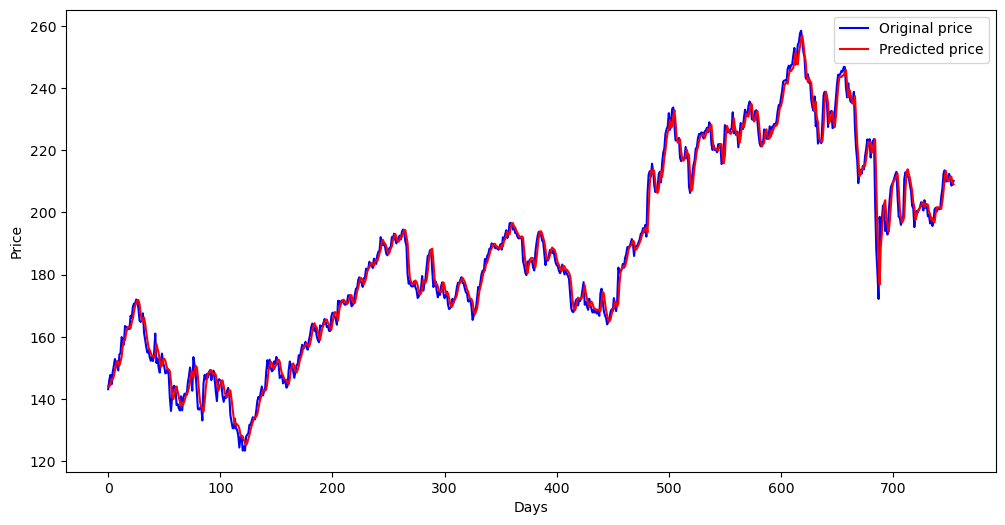

In [96]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, 'b', label='Original price')
plt.plot(y_predicted, 'r', label = 'Predicted price')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()

10. Model evaluation

In [101]:
#MSE
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_predicted)
print(f"Mean squared error (MSE): {mse}")

Mean squared error (MSE): 12.637363196324808


In [102]:
#RMSE
rmse = np.sqrt(mse)
print(f"Root mean squared error (RMSE): {rmse}")

Root mean squared error (RMSE): 3.55490691809572


In [104]:
#R-Squared
r2 = r2_score(y_test, y_predicted)
print(r2)

0.9871202515077241
